https://statso.io/forecasting-website-traffic-case-study/

In [ ]:
# The dataset I am using for Website Traffic Forecasting is collected from 
# the daily traffic data of thecleverprogrammer.com. 
# It contains data about daily traffic data from June 2021 to June 2022.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm


In [2]:
data = pd.read_csv("Thecleverprogrammer.csv")
data.head()

,Date,Views
0,01/06/2021,7831
1,02/06/2021,7798
2,03/06/2021,7401
3,04/06/2021,7054
4,05/06/2021,7973


In [5]:
data["Date"] = pd.to_datetime(data["Date"], 
                              format="%d/%m/%Y")
data.info

<bound method DataFrame.info of           Date  Views
0   2021-06-01   7831
1   2021-06-02   7798
2   2021-06-03   7401
3   2021-06-04   7054
4   2021-06-05   7973
..         ...    ...
386 2022-06-22  11154
387 2022-06-23  10382
388 2022-06-24   9555
389 2022-06-25   8502
390 2022-06-26   8368

[391 rows x 2 columns]>

In [7]:
data.isnull().sum()

Date     0
Views    0
dtype: int64

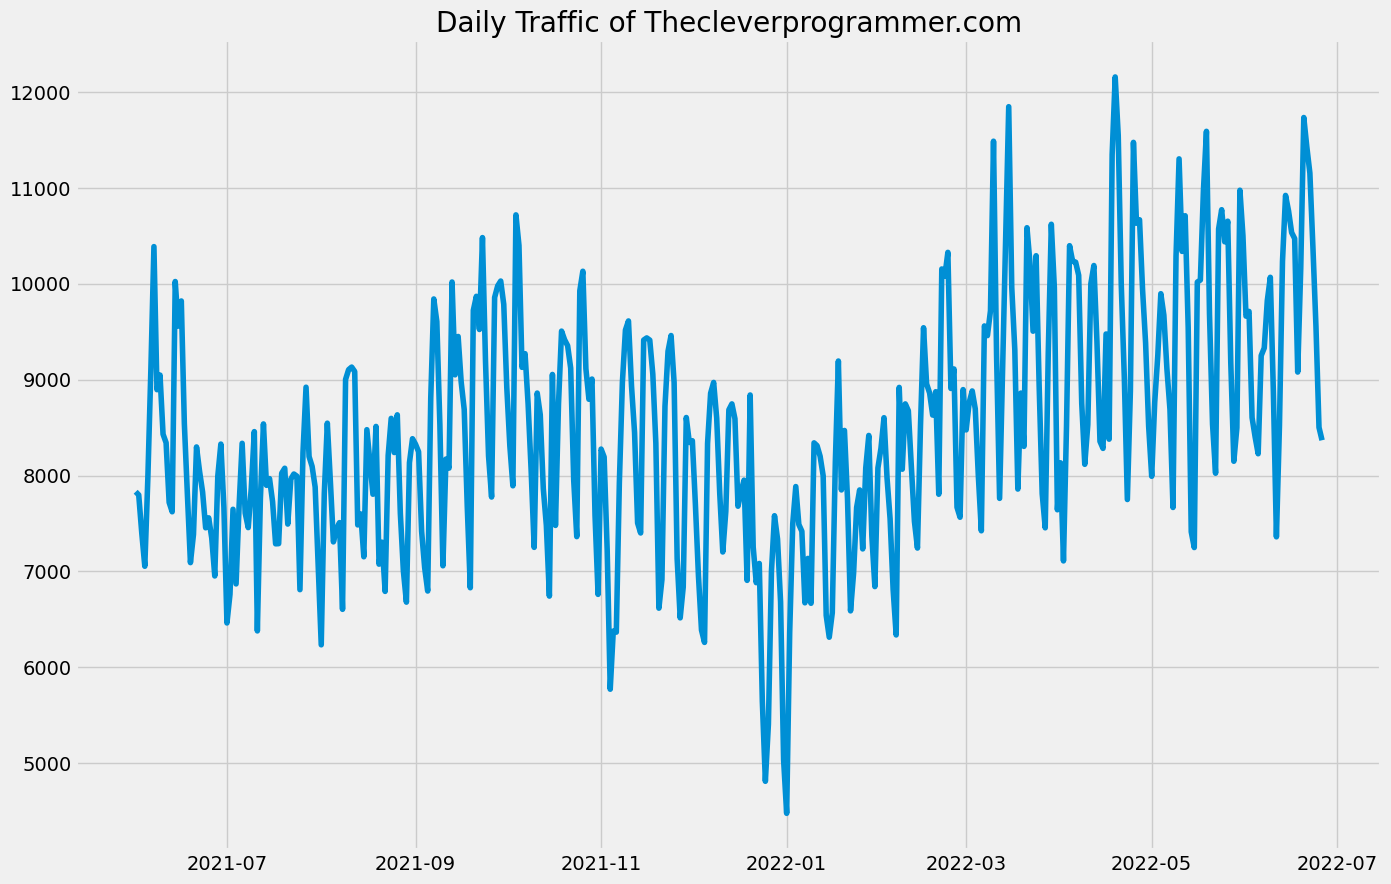

In [10]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Views"])
plt.title("Daily Traffic of Thecleverprogrammer.com")
plt.show()

Our website traffic data is seasonal because the traffic on the website increases during the weekdays and decreases during the weekends. It is valuable to know if the dataset is seasonal or not while working on the problem of Time Series Forecasting. 

<Figure size 640x480 with 0 Axes>

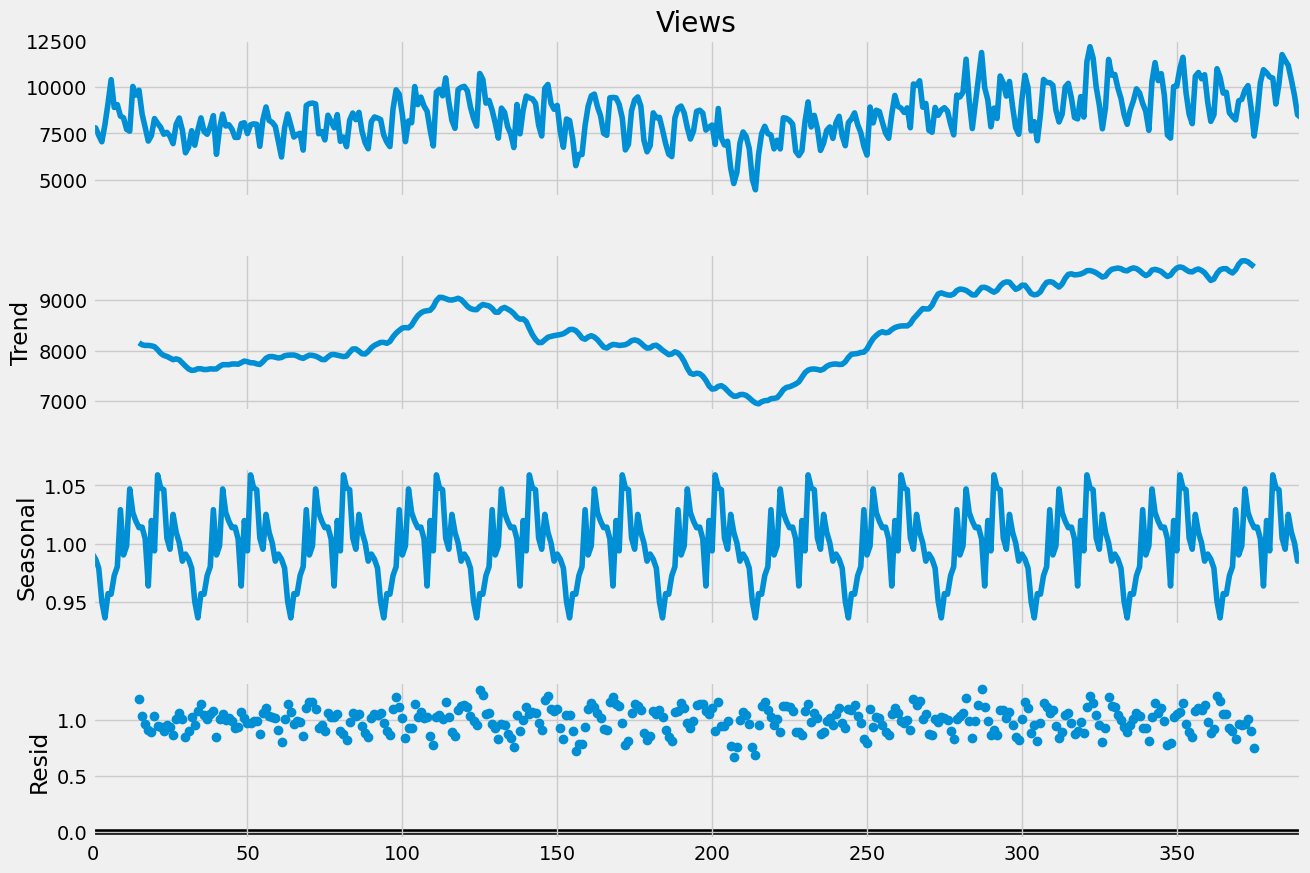

In [12]:
result = seasonal_decompose(data["Views"], 
                            model='multiplicative', 
                            period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

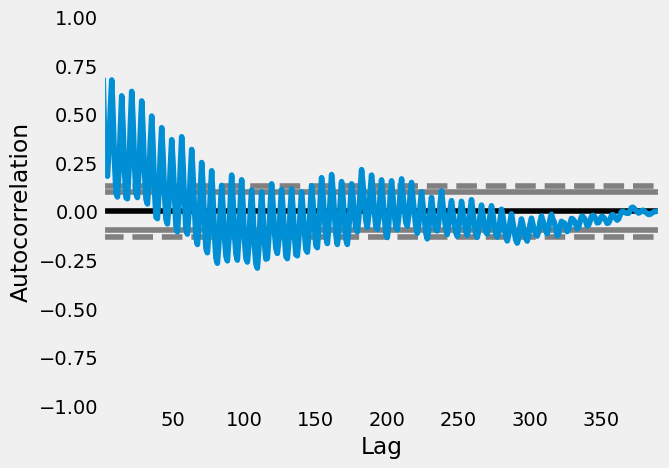

In [13]:
pd.plotting.autocorrelation_plot(data["Views"])

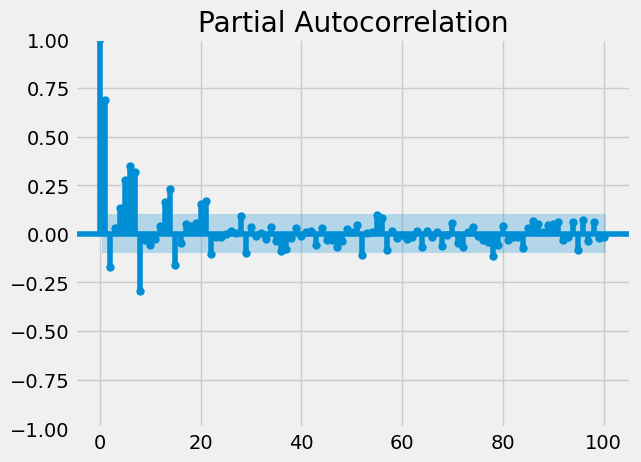

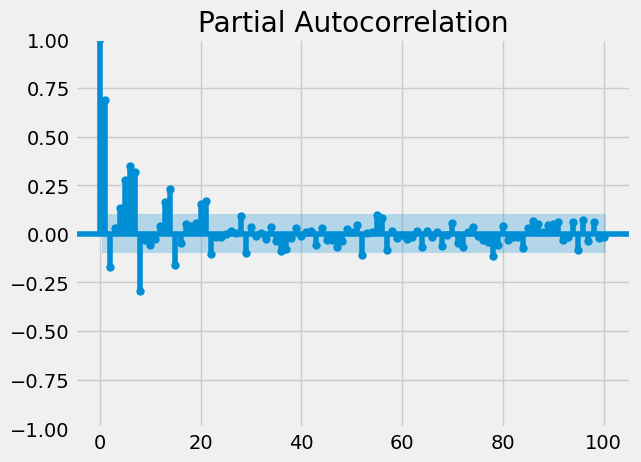

In [14]:
plot_pacf(data["Views"], lags = 100)

In [15]:
p, d, q = 5, 1, 2
model=sm.tsa.statespace.SARIMAX(data['Views'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

c:\Users\ipek\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\ipek\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3099.164
Date:                            Wed, 24 Apr 2024   AIC                           6228.329
Time:                                    23:28:43   BIC                           6287.352
Sample:                                         0   HQIC                          6251.754
                                            - 391                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7555      0.129      5.840      0.000       0.502       1.009
ar.L2         -0.7675      0.134   

Now let’s forecast traffic on the website for the next 50 days:

In [16]:
predictions = model.predict(len(data), len(data)+50)
print(predictions)

391     9867.122423
392    10806.914161
393    10766.031460
394     9866.867944
395     8790.192867
396     8249.944467
397     8924.591513
398     9702.187747
399    10289.775604
400    10631.534715
401     9894.967045
402     9356.004275
403     9013.213313
404     9056.085034
405    10514.457528
406    11010.476635
407    10937.473594
408    10137.443044
409     9461.069362
410     8618.356258
411     9142.592908
412    10356.875936
413    10637.431471
414    10827.000117
415    10291.771615
416     9458.146332
417     9004.209945
418     9127.201652
419     9897.814037
420    10278.774700
421    10768.744273
422     9952.868919
423     9549.902867
424     9009.448141
425     8798.307920
426    10120.292579
427    10868.104437
428    10945.585085
429    10433.784325
430     9452.409849
431     8666.376464
432     8683.114856
433    10047.266451
434    10536.134525
435    10887.001613
436    10509.870886
437     9358.077675
438     9153.018757
439     9322.153149
440    10275.258988


<Axes: >

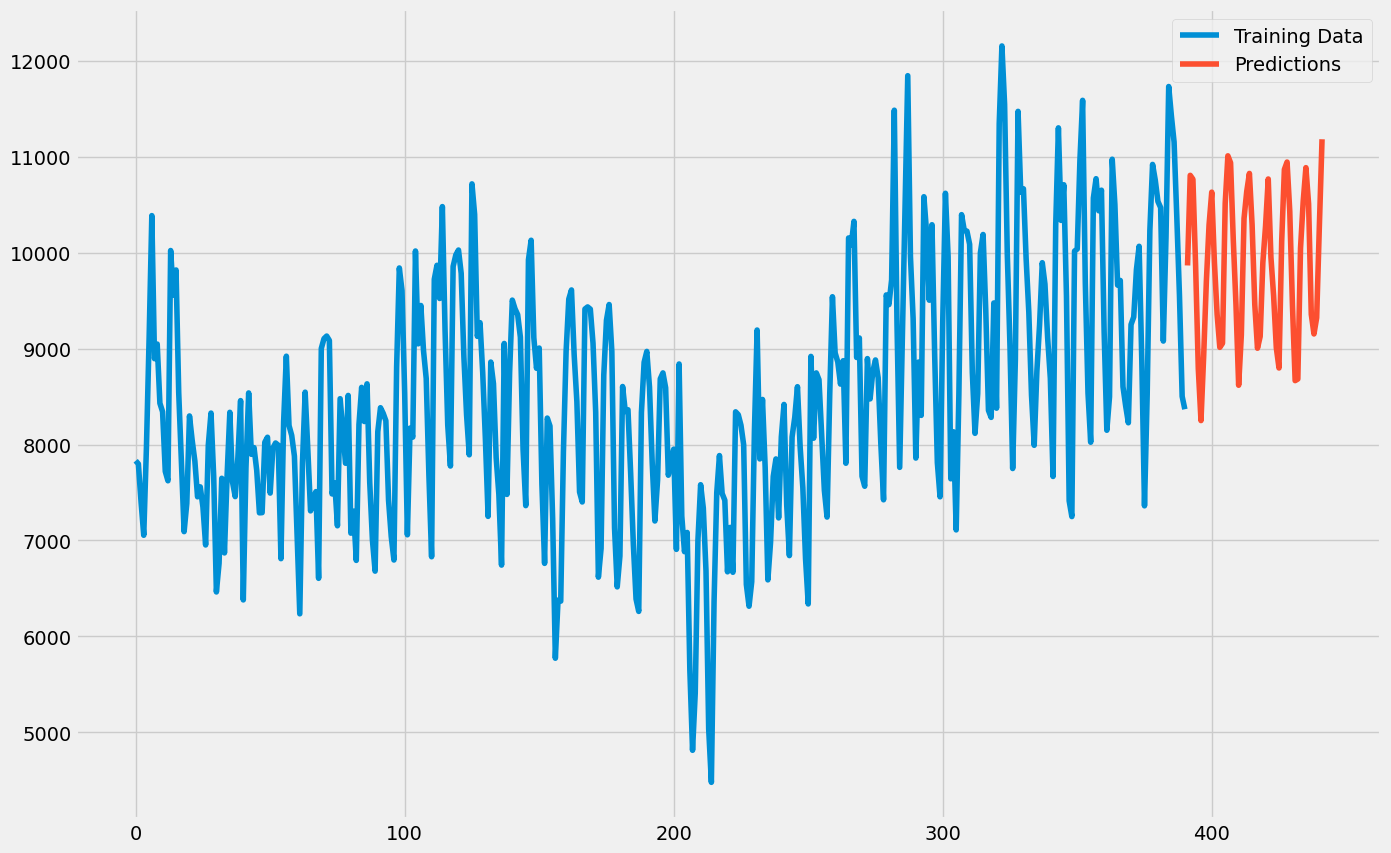

In [17]:
data["Views"].plot(legend=True, label="Training Data", 
                   figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")